In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

city_load = 'raw_data/city_data.csv'
ride_load = 'raw_data/ride_data.csv'

city_data = pd.read_csv(city_load)
ride_data = pd.read_csv(ride_load)

cr_data = pd.merge(city_data, ride_data, on='city')
cr_data.head(10)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [8]:
#Seperate Urban data from dataset and define three variables using Panadas functions
urban_cities = cr_data[cr_data['type']=='Urban']
u_ridecount = urban_cities.groupby(["city"]).count()["ride_id"]
u_avgfare = urban_cities.groupby(["city"]).mean()["fare"]
u_drivercount = urban_cities.groupby(["city"]).mean()["driver_count"]

#Seperate Suburban data from dataset and define three variables using Panadas functions
suburban_cities = cr_data[cr_data['type']=='Suburban']
s_ridecount = suburban_cities.groupby(["city"]).count()["ride_id"]
s_avgfare = suburban_cities.groupby(["city"]).mean()["fare"]
s_drivercount = suburban_cities.groupby(["city"]).mean()["driver_count"]

#Seperate Rural data from dataset and define three variables using Panadas functions
rural_cities = cr_data[cr_data['type']=='Rural']
r_ridecount = rural_cities.groupby(["city"]).count()["ride_id"]
r_avgfare = rural_cities.groupby(["city"]).mean()["fare"]
r_drivercount = rural_cities.groupby(["city"]).mean()["driver_count"]


ValueError: not enough values to unpack (expected 1, got 0)

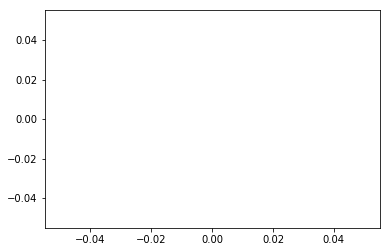

In [36]:
#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Urban Areas
Urban_scatter,=plt.plot(kind='scatter', x='u_ridecount', y='u_avgfare', grid=True, s=8*u_drivercount, c='gold', edgecolor='black', linewidths=1, marker='o', alpha=.9, label='Urban')

#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Suburban Areas
Suburban_scatter,=plt.plot(kind='scatter', x='s_ridecount', y='s_avgfare', grid=True, s=8*u_drivercount, c='skyblue', edgecolor='black', linewidths=1, marker='o', alpha=.9, label='Urban')

#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Rural Areas
Rural_scatter,=plt.plot(kind='scatter', x='r_ridecount', y='r_avgfare', grid=True, s=8*u_drivercount, c='skyblue', edgecolor='black', linewidths=1, marker='o', alpha=.9, label='Urban')

#Scatter Plot Beautification 
plt.title('Pyber Ride Data 2016')
plt.xlabel('Total Number of Rides/City')
plt.ylabel('Average Fare ($)')
plt.xlim((0,45))
plt.ylim((15,55))
plt.grid=True
plt.legend(handles[Urban_scatter, Suburban_scatter, Rural_scatter], loc='best')